# Training First Model 
poblem we are trying to solve is to convert from Celsius to Fahrenheit 

```
f = c * 1.8 + 32
```


### Import Dependencies 
- we are importing TensorFlow as tf
- tell tf to only display errors 
- import numpy to help represent data

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

### Setup Training Data
- in order to train the model we need to set up the data 
- we can create 2 list of celsius_q and fahrenheit_a

In [4]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### Create The Model 
- create the model using a dense network
- since the problem is straight forward we only need 1 layer
  
##### Build A Layer 
- call the layer l0 and create it by insttantiating tf.keras.layers.Dense with the config below: 
    - input_shape=[1]:
        - specifies that input of layer is single value. 
        - shape is 1d array with one member
        - since we are using 1 layer, first layer's input shape is the same as input shape of entire model. 
    - units=1: 
        - specifies number of neurons in the layer.
        - neurons defines hhow many internal variables the layer has to try to learn how to solve the problem 

In [10]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# assemble the layers into the model 
model = tf.keras.Sequential([l0])


# compile themodel with loss and optimizer functions 
# - loss function : way of measuring how far off predictions are from desired outcome 
# - optimizer function: way of adjusting internal values in order to reduce the loss 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

### Train The Model 
- during training: 
    - model takes input 
    - performs calculation using current internal variables ("weights") 
    - outpus values of Fahrenheit 
- first time will be completely off from actual value 
- once the loss is predicted the optimizer will adjust the weights accordingly 
- we use the `fit(...)` method to cycle through calculation, comparing, and adjusting 

In [17]:
history = model.fit(celsius_q, fahrenheit_a, epochs=300, verbose=False)
print("Finished training the model")

Finished training the model


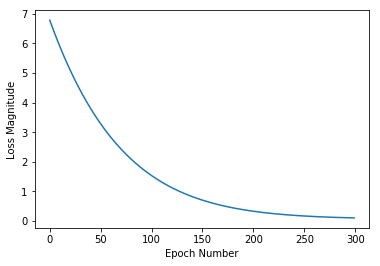

In [18]:
# display the training statistics 
%matplotlib inline
import matplotlib.pyplot as plt 
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])


In [19]:
print(model.predict([100.0]))

[[211.71619]]


In [20]:
print("these are the layer variables: {}".format(l0.get_weights()))

these are the layer variables: [array([[1.7996575]], dtype=float32), array([31.750446], dtype=float32)]
